In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import os
import tensorflow as tf
from tensorflow.keras.datasets import mnist

## Load The Dataset and visualization 

In [6]:
# load the dataset
df = pd.read_csv('/Users/kun/Documents/Tri 3/DPF/Assignments/Assignment1/diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df.shape

(768, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.describe().T.style.background_gradient(cmap='hot_r')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


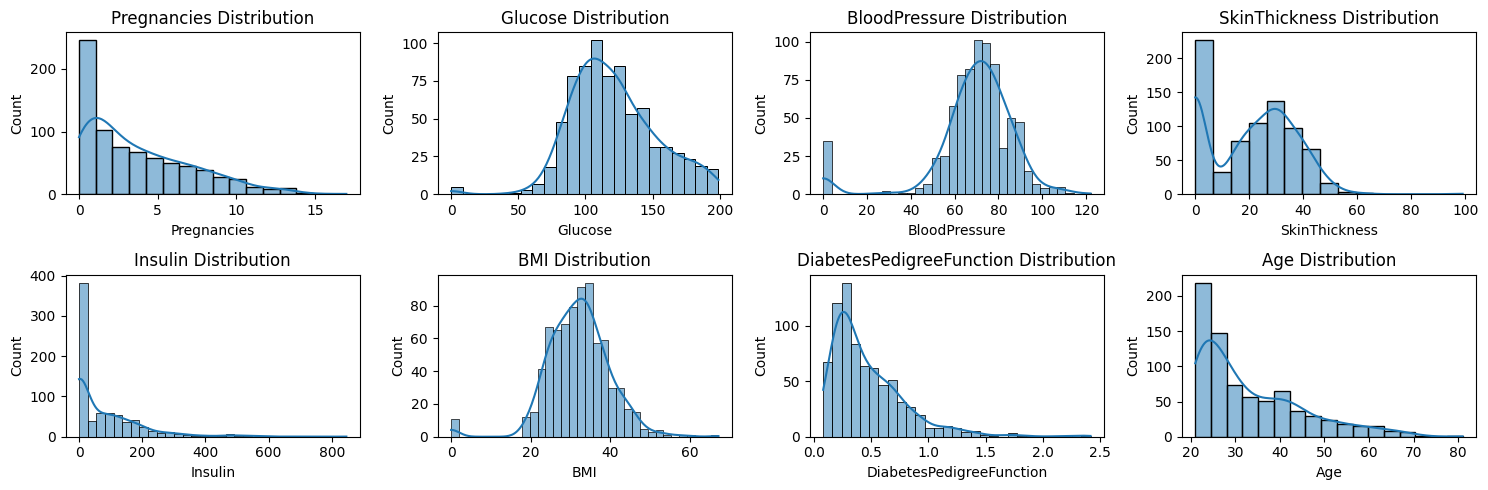

In [15]:
# Dataset visualization 
cols = df.columns

# Histplot visualization
fig, axs = plt.subplots(2, 4, figsize=(15, 5))  

for i in range(8):
    row, col = divmod(i, 4)  
    sns.histplot(df[cols[i]], kde=True, ax=axs[row, col])
    axs[row, col].set_title(f"{cols[i]} Distribution")

plt.tight_layout()
plt.show()

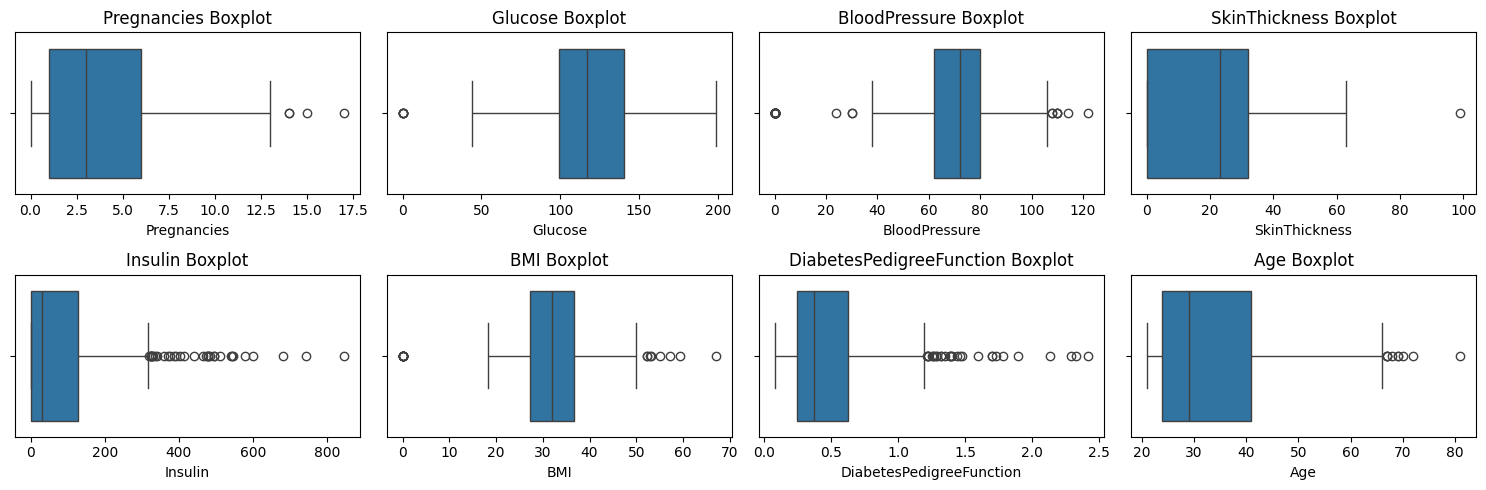

In [16]:
#Boxplot visualization
fig, axs = plt.subplots(2, 4, figsize=(15,5)) 

for i in range(8):
    row, col = divmod(i, 4)  
    sns.boxplot(data=df, x=cols[i], ax=axs[row, col])
    axs[row, col].set_title(f"{cols[i]} Boxplot")

plt.tight_layout()
plt.show()

In [17]:
# outliers detection
def detect_outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    
    return df[column][(df[column] < (q1-1.5*IQR))|(df[column] > (q3 + 1.5*IQR))].tolist()
    

In [18]:
def replace_outlier_with_median(column,outliers):
    df[column] = np.where(df[column].isin(outliers),df[column].median(),df[column])
    return df[column]

In [19]:
outliers = []

# Detect the abnormal values
for col in cols[:-1]:  # 'Outcome' no need to detection
    outliers.append(detect_outliers(col))

outliers_dict = {col: detect_outliers(col) for col in cols[:-1]}

In [20]:
for i, col in enumerate(cols[:-1]):
    df[col] = replace_outlier_with_median(col,outliers[i])
for col in cols[:-1]:
    print(f"{col}:\t {detect_outliers(col)}")

Pregnancies:	 []
Glucose:	 []
BloodPressure:	 [38.0, 106.0, 106.0, 106.0]
SkinThickness:	 []
Insulin:	 [300.0, 304.0, 284.0, 285.0, 318.0, 280.0, 278.0, 293.0, 285.0, 310.0, 277.0, 293.0, 291.0]
BMI:	 [49.7, 50.0, 49.6]
DiabetesPedigreeFunction:	 [1.114, 1.189, 1.101, 1.136, 1.127, 1.191, 1.095, 1.138, 1.159, 1.144, 1.154, 1.162, 1.174, 1.096, 1.182]
Age:	 [65.0, 66.0, 65.0, 65.0, 66.0, 66.0, 66.0]


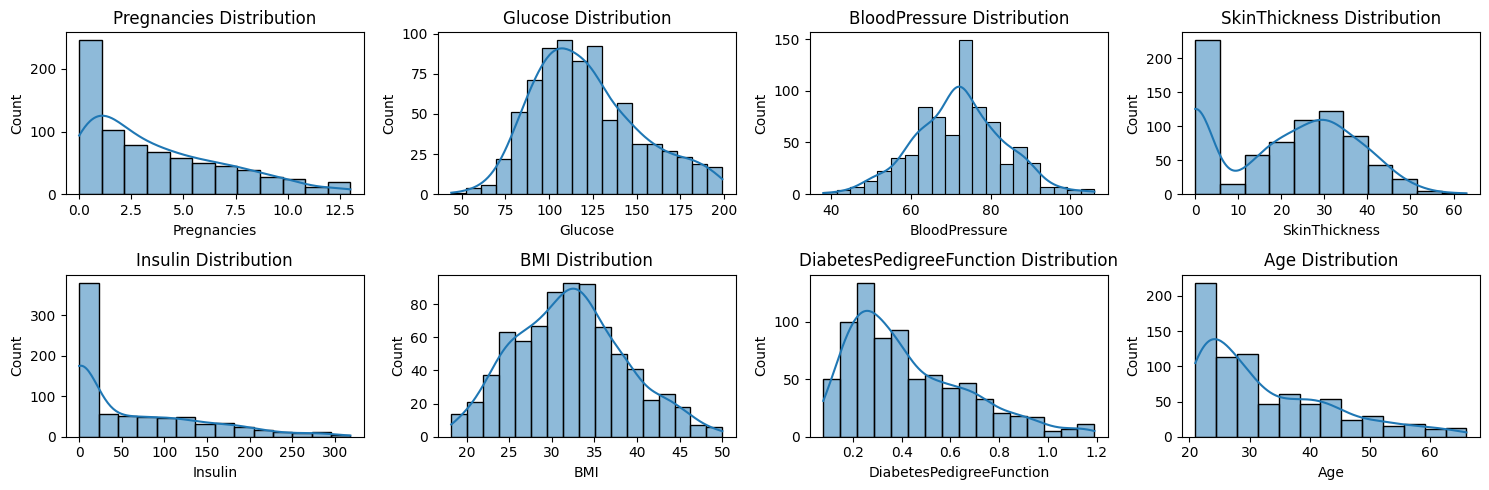

In [21]:
fig, axs = plt.subplots(2, 4, figsize=(15, 5))  

# Histplot visualization after cleaning
for i in range(8):
    row, col = divmod(i, 4) 
    sns.histplot(df[cols[i]], kde=True, ax=axs[row, col])
    axs[row, col].set_title(f"{cols[i]} Distribution")

plt.tight_layout()
plt.show()

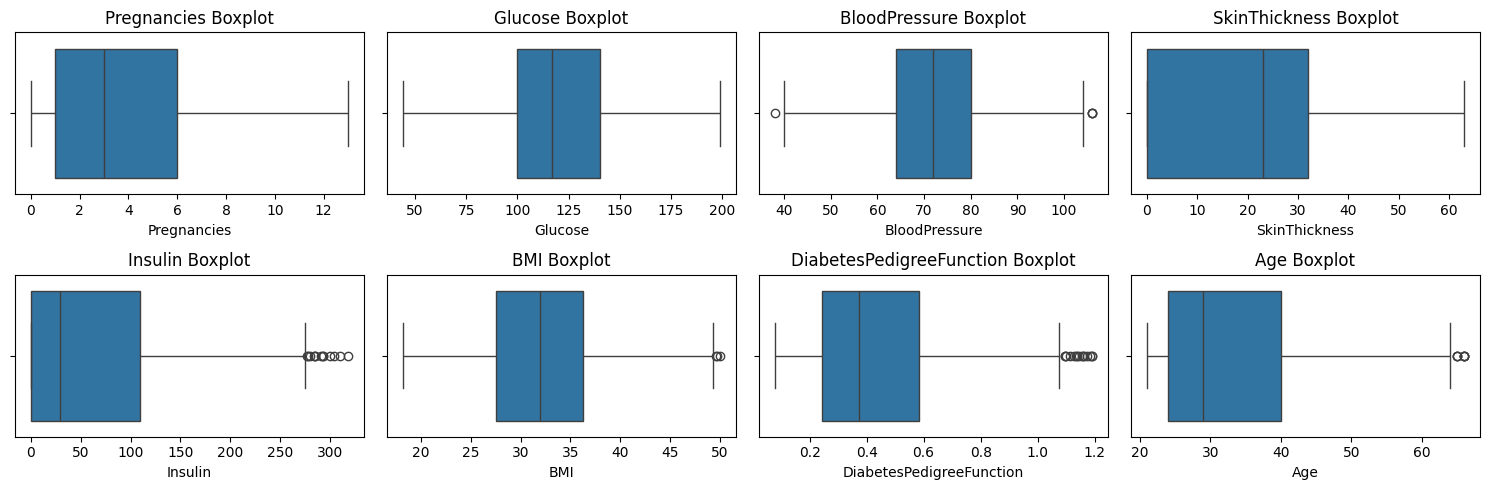

In [22]:
fig, axs = plt.subplots(2, 4, figsize=(15,5))  

#Boxplot visualization after cleaning
for i in range(8):
    row, col = divmod(i, 4)  
    sns.boxplot(data=df, x=cols[i], ax=axs[row, col])
    axs[row, col].set_title(f"{cols[i]} Boxplot")

plt.tight_layout()
plt.show()

In [23]:
df.describe().T.style.background_gradient(cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.782552,3.270644,0.000000,1.000000,3.000000,6.000000,13.000000
Glucose,768.000000,121.656250,30.438286,44.000000,99.750000,117.000000,140.250000,199.000000
BloodPressure,768.000000,72.196615,11.146723,38.000000,64.000000,72.000000,80.000000,106.000000
SkinThickness,768.000000,20.437500,15.698554,0.000000,0.000000,23.000000,32.000000,63.000000
Insulin,768.000000,60.919271,77.635666,0.000000,0.000000,29.750000,110.000000,318.000000
BMI,768.000000,32.198958,6.410558,18.200000,27.500000,32.000000,36.300000,50.000000
DiabetesPedigreeFunction,768.000000,0.427667,0.245162,0.078000,0.243750,0.371750,0.582250,1.191000
Age,768.000000,32.760417,11.055385,21.000000,24.000000,29.000000,40.000000,66.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


Having Diebetes:	268
Not Having Diebetes:	500
diabetes_percentage:	0.35 %
not diabetes_percentage:	0.65 %


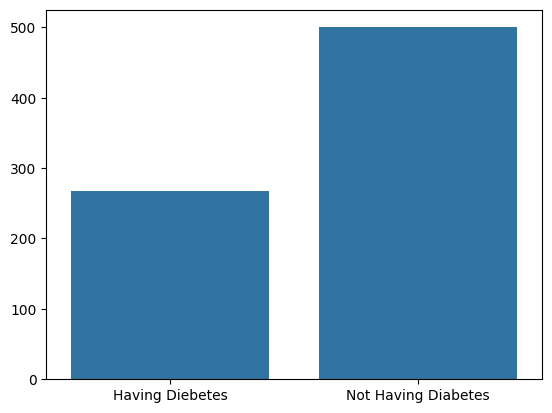

In [24]:
having_diabetes = df[df["Outcome"]==1]
not_having = df[~(df["Outcome"]==1)]



print("Having Diebetes:\t"+ str(len(having_diabetes)))
print("Not Having Diebetes:\t"+ str(len(not_having
                                       )))
sns.barplot(x=['Having Diebetes','Not Having Diabetes'], y= [len(having_diabetes),len(not_having)],
       
           )

print("diabetes_percentage:\t" + str(round(len(having_diabetes)/len(df),2)) + " %")
print("not diabetes_percentage:\t" + str(round(len(not_having)/len(df),2)) + " %")

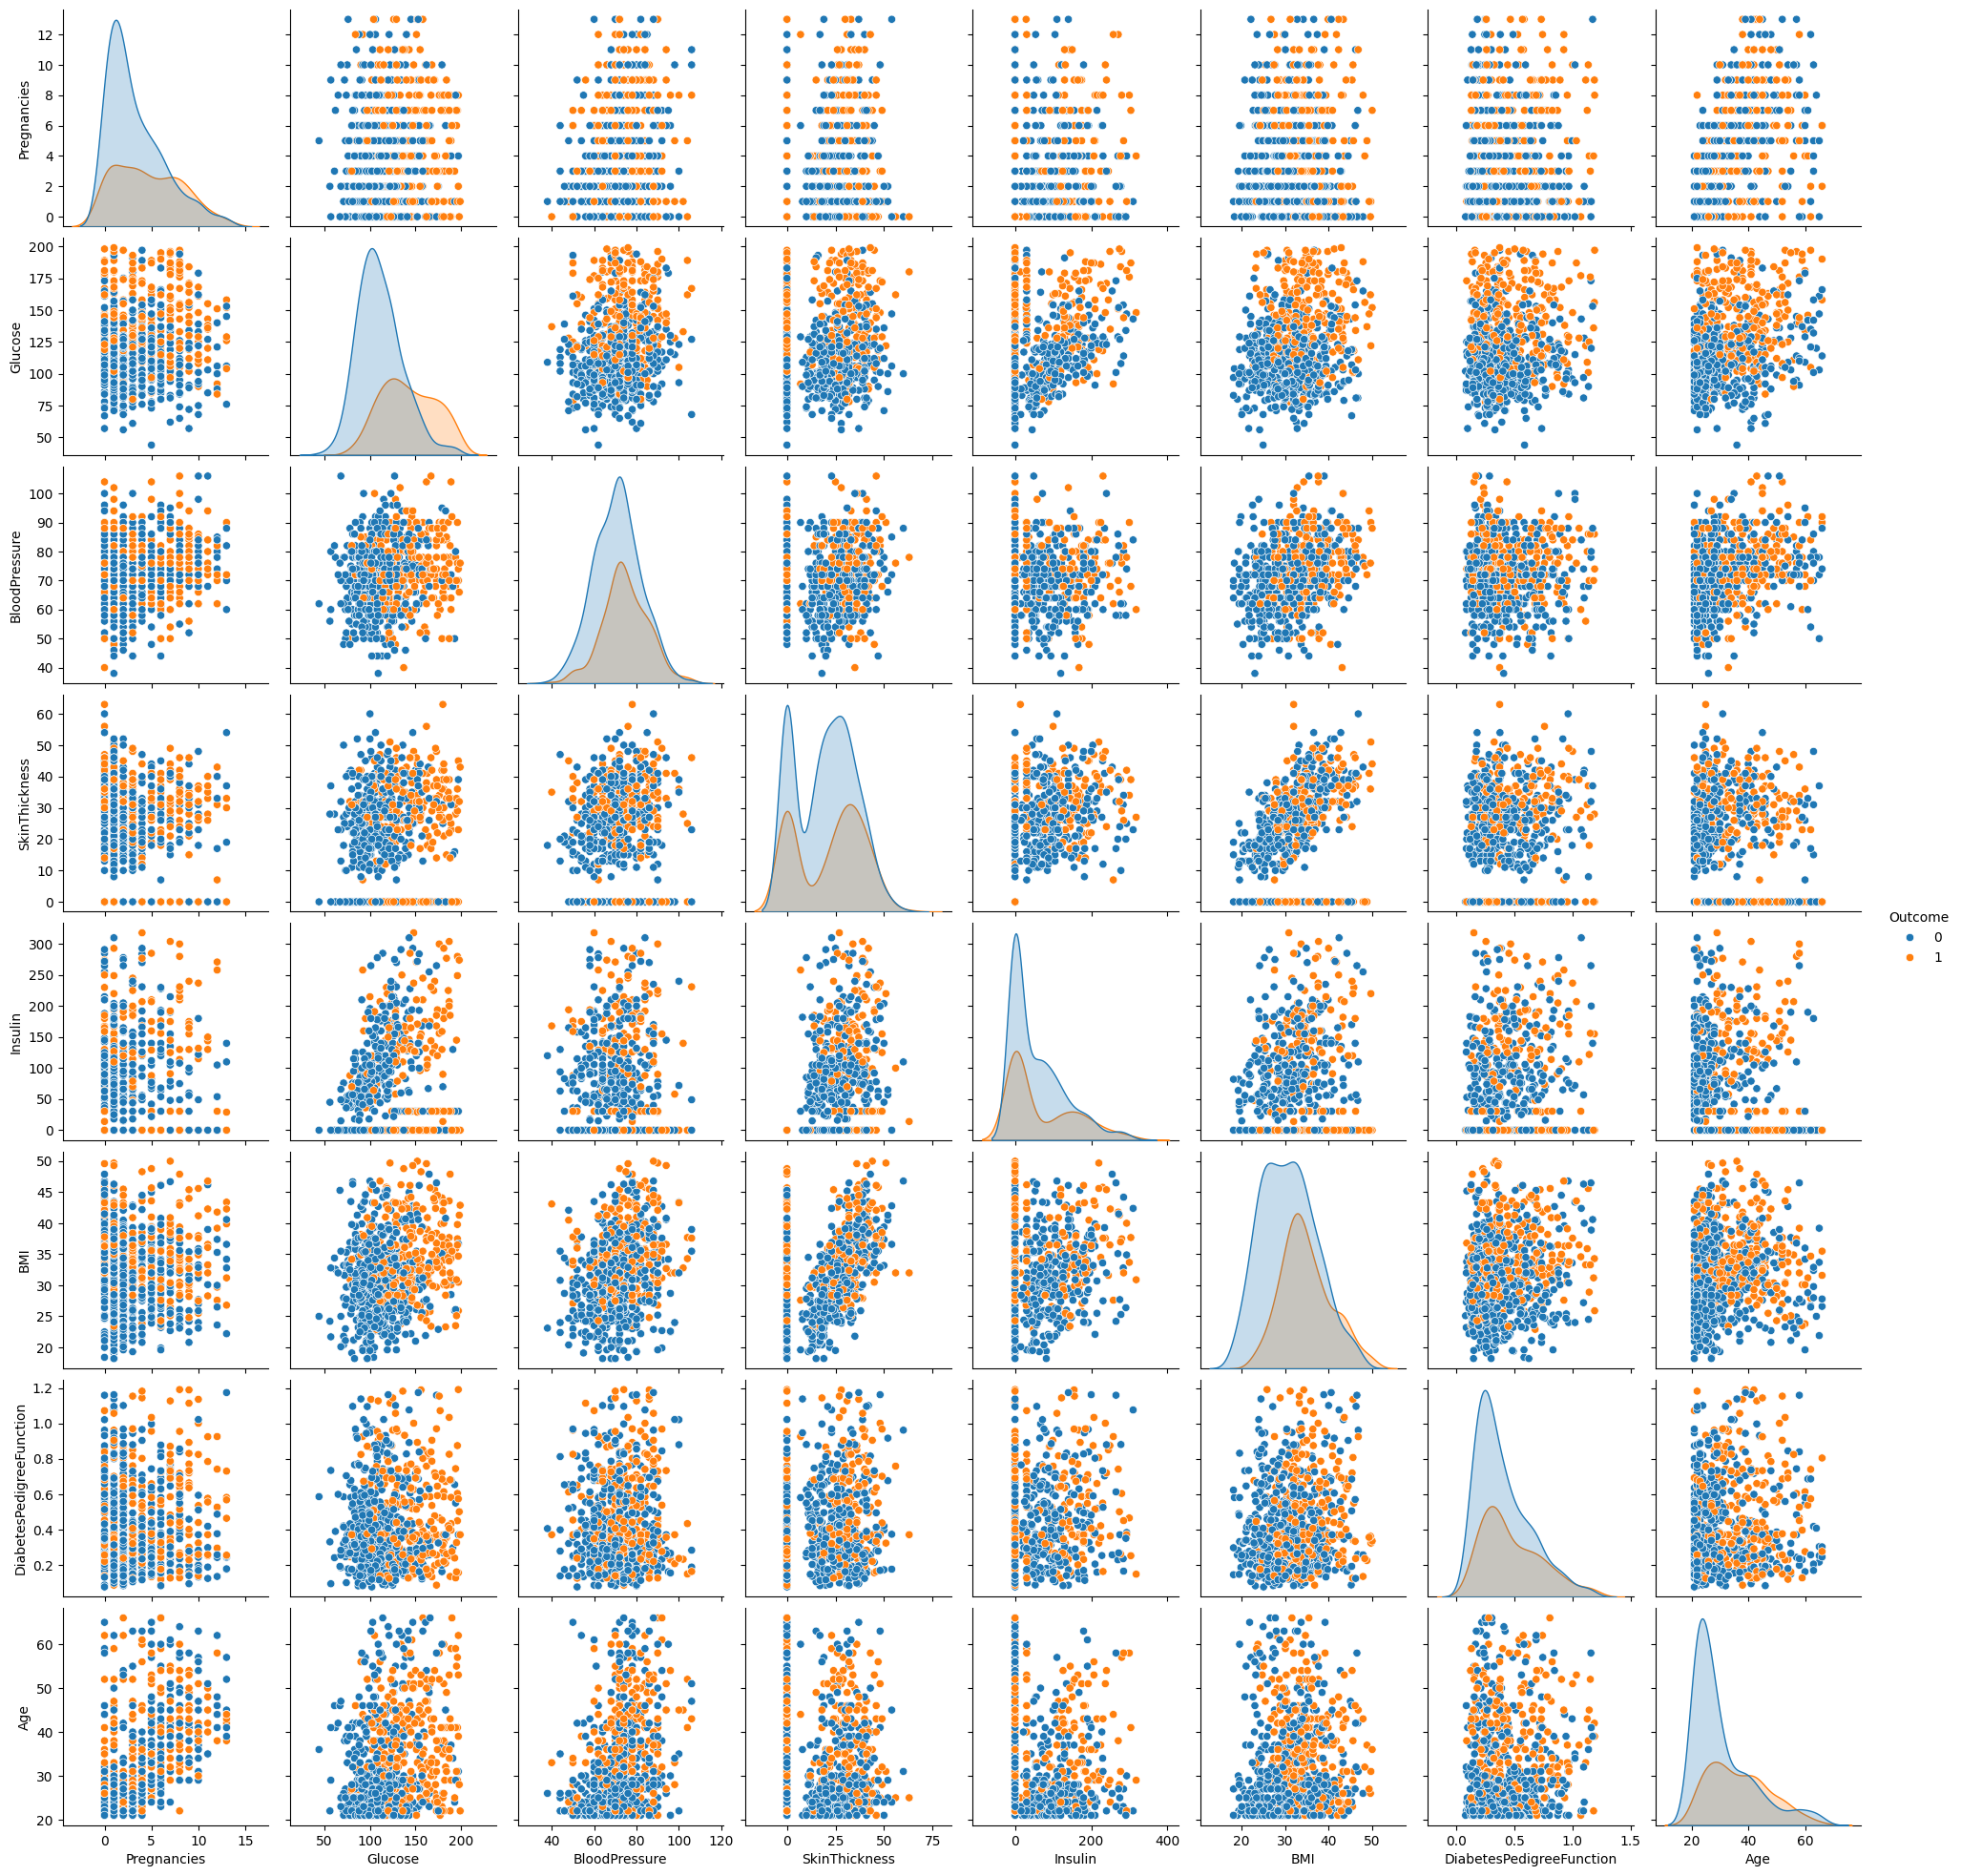

In [25]:
sns.pairplot(data=df,hue='Outcome',hue_order=[0,1])

## Modeling And Evaluation 

In [43]:
#Split the dataset 
X = df.drop('Outcome',axis=1)
y = df['Outcome'] 

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=44)

In [44]:
# print data's shapes
print('shape of X_train: ', X_train.shape)
print('shape of y_train: ', y_train.shape)
print('shape of X_test: ', X_test.shape)
print('shape of y_test: ', y_test.shape)

shape of X_train:  (576, 8)
shape of y_train:  (576,)
shape of X_test:  (192, 8)
shape of y_test:  (192,)


In [45]:
# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# build MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# fit 
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6015 - loss: 0.6635 - val_accuracy: 0.7069 - val_loss: 0.5602
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7678 - loss: 0.5277 - val_accuracy: 0.7672 - val_loss: 0.4865
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7281 - loss: 0.5387 - val_accuracy: 0.8276 - val_loss: 0.4425
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7626 - loss: 0.4762 - val_accuracy: 0.8103 - val_loss: 0.4196
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7749 - loss: 0.4578 - val_accuracy: 0.8017 - val_loss: 0.4241
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4513 - val_accuracy: 0.8017 - val_loss: 0.4231
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.4451 - val_accuracy: 0.8362 - val_loss: 0.4212
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7573 - loss: 0.4758 - val_accuracy: 0.8190 - val_loss:

In [48]:
# 5. eavaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.7394 - loss: 0.4587
Test Accuracy: 0.7448


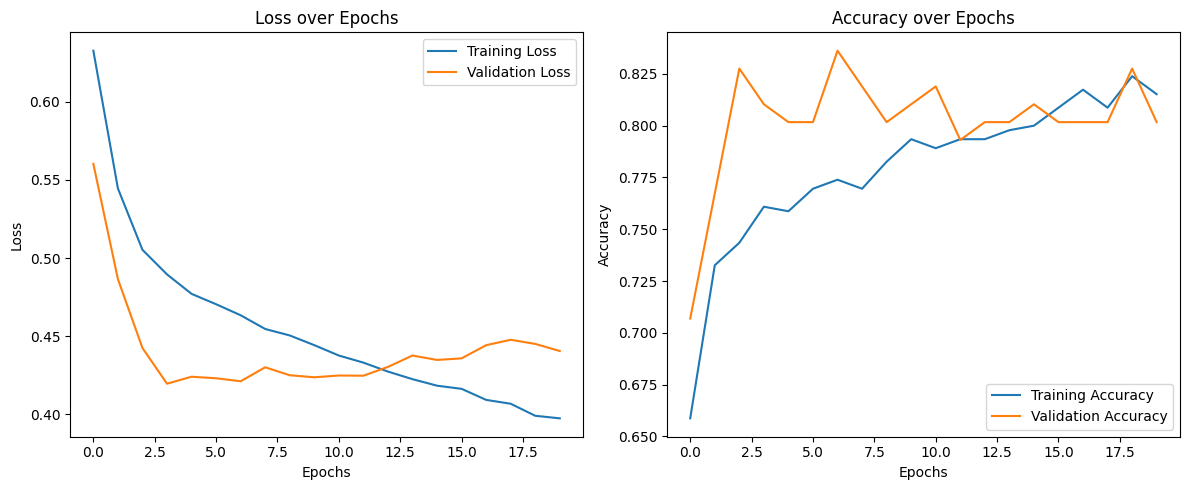

In [49]:
plt.figure(figsize=(12, 5))

# draw the loss changes
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# draw the accuracy changes
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
# improved MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(1, activation='sigmoid')  # 输出层
])

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1)

# early stoping method
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# fit
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2, 
    callbacks=[lr_scheduler, early_stopping]
)

# evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5254 - loss: 0.8247 - val_accuracy: 0.4914 - val_loss: 0.6916 - learning_rate: 1.0000e-04
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5177 - loss: 0.8462 - val_accuracy: 0.4569 - val_loss: 0.6923 - learning_rate: 1.0000e-04
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6109 - loss: 0.7228 - val_accuracy: 0.4052 - val_loss: 0.6942 - learning_rate: 1.0000e-04
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6370 - loss: 0.7260 - val_accuracy: 0.4310 - val_loss: 0.6906 - learning_rate: 1.0000e-04
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5787 - loss: 0.7708 - val_accuracy: 0.4741 - val_loss: 0.6859 - learning_rate: 1.0000e-04
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6306 - loss: 0.6824 - val_accuracy: 0.5431 - val_loss: 0.6793 - learning_rate: 1.0000e-04
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6582 - loss

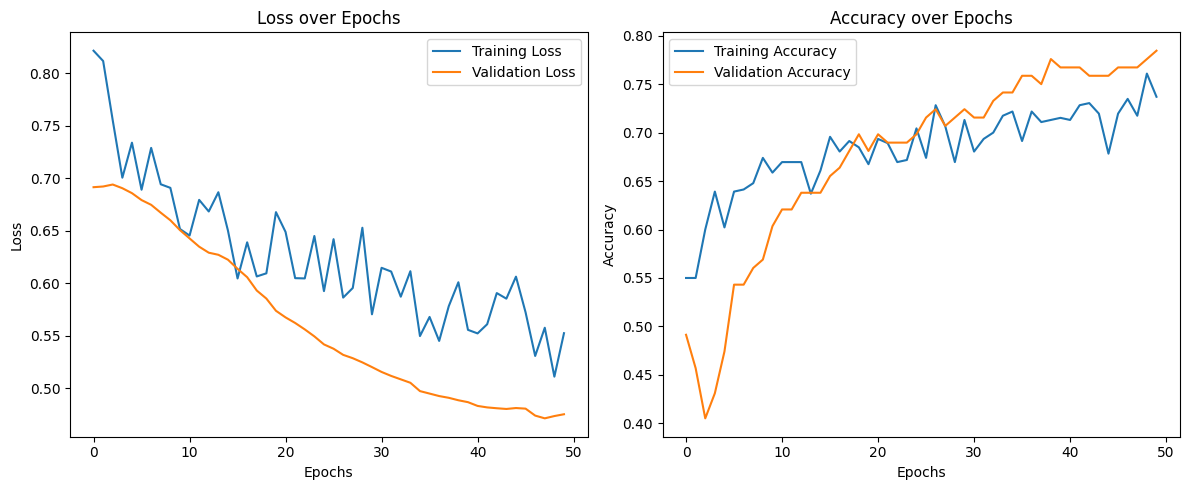

In [38]:
plt.figure(figsize=(12, 5))

# draw the loss changes
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# draw the accuracy changes
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()